In [144]:
# Importing python packages
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})

#Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\autos.csv'
df1 = pd.read_csv(file_input, encoding='latin-1', index_col=None)

# Filling missing values
df1['vehicleType'].fillna(value='not-available', inplace=True)
df1['gearbox'].fillna(value='not-available', inplace=True)
df1['model'].fillna(value='not-available', inplace=True)
df1['fuelType'].fillna(value='not-available', inplace=True)
df1['notRepairedDamage'].fillna(value='not-available', inplace=True)

# Removing the timestamp from a datetime in datadrame
df1['dateCreated'] = pd.to_datetime(df1['dateCreated'])

      
# scaled feature in a 'kilometer' column
df1['kilometer'] = df1['kilometer']/1000


final_data = ['price','vehicleType','yearOfRegistration','gearbox','powerPS',
                   'kilometer','fuelType','brand','notRepairedDamage']

df1 = df1[final_data]


# Removing some extreme outliers
df1 = df1[(df1.price > 100) 
      & (df1.price < 150000) 
      & (df1.powerPS > 0) 
      & (df1.powerPS < 1000)
      & (df1.yearOfRegistration >=1900)
      & (df1.yearOfRegistration <=2018)]

df1.head()

Populating the interactive namespace from numpy and matplotlib


,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manuell,190,125.0,diesel,audi,ja
2,9800,suv,2004,automatik,163,125.0,diesel,jeep,not-available
3,1500,kleinwagen,2001,manuell,75,150.0,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,90.0,diesel,skoda,nein
5,650,limousine,1995,manuell,102,150.0,benzin,bmw,ja


In [146]:
# Creating dummy variables on categorical data for easy interpretation

final_data = pd.get_dummies(df1, columns =['vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage'])
final_data.head()

,price,yearOfRegistration,powerPS,kilometer,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_ja,notRepairedDamage_nein,notRepairedDamage_not-available
1,18300,2011,190,125.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9800,2004,163,125.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1500,2001,75,150.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,3600,2008,69,90.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,650,1995,102,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Linear Regression with Used Cars Database
***

Here, 

$y$ = used cars prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which I will use to fit a linear regression model and predict used cars prices. I will use the least-squares method to estimate the coefficients.  

In [147]:
from sklearn.linear_model import LinearRegression

# Defining the first parameter 
X = final_data.drop(['price'], axis='columns', inplace=False)

# Defining the second parameter 
y = final_data['price']

## Training and Test Datasets
When fitting models, we would like to ensure two things:

* We have found the best model (in terms of model parameters).
* The model is highly likely to generalize i.e. perform well on unseen data.

I will try first by building linear regression base line model using 'L1' and 'L2' regularization by :
* Splitting the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [148]:
# Import SK learn train test split
from sklearn.model_selection import train_test_split

# Assigning variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

## Linear Regression Base Line Model

#### Fitting a Linear Model using Sklearn

*I am going to use all the 66 predictors to fit a linear regression  model. First, I am going to print the intercept and number of coefficients and then I will try to construct a data frame that contains features and estimated coefficients.*

In [149]:
# Import SK learn Linear Regression
from sklearn.linear_model import LinearRegression

# Creating a LinearRegression object 
lr1 = LinearRegression()

# The lm.fit() function estimates the coefficients the linear regression using least squares 
# Fit the model on the trainng data.

lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
# Prints y-intercept
print('Estimated intercept coefficient: {}'.format(lr1.intercept_))

# Prints the beta coefficients in same order as passed
print('Number of coefficients: {}'.format(len(lr1.coef_)))

Estimated intercept coefficient: -339734.0230521047
Number of coefficients: 66


In [151]:
# Pairing feature names and coefficients together
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lr1.coef_})[['features', 'estimatedCoefficients']].sort_values(by = 'estimatedCoefficients')

,features,estimatedCoefficients
39,brand_lada,-4123.185166
27,brand_chrysler,-3225.670127
21,fuelType_lpg,-2621.408968
10,vehicleType_not-available,-2598.425769
38,brand_kia,-2094.006622
35,brand_hyundai,-2062.412497
26,brand_chevrolet,-2014.815474
55,brand_smart,-2009.491001
52,brand_saab,-1906.559811
29,brand_dacia,-1886.817967


In [152]:
# Passing the predict method in the test data. This will return predicted values of y given the new test X data.
linear_y_pred_train = lr1.predict(X_train) 
linear_y_pred_test = lr1.predict(X_test)

In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import ipy_table as tbl

# The mean absolute error for Train and Test Set
mae_train = mean_absolute_error(y_train, linear_y_pred_train)
mae_test = mean_absolute_error(y_test, linear_y_pred_test)

# The mean squared error for Train and Test Set
mse_train = mean_squared_error(y_train, linear_y_pred_train)
mse_test = mean_squared_error(y_test, linear_y_pred_test)

# The root mean squared error for Train and Test Set
rmse_train = sqrt(mean_squared_error(y_train, linear_y_pred_train))
rmse_test = sqrt(mean_squared_error(y_test, linear_y_pred_test))

# Variance score: 1 is perfect prediction
# Variance score for Train and Test Set
r2_train = r2_score(y_train, linear_y_pred_train)
r2_test = r2_score(y_test, linear_y_pred_test)

result = [
    ['Item', 'Train_Score_Values', 'Test_Score_Values'],
    ['Mean absolute error', mae_train, mae_test],
    ['Mean squared error', mse_train, mse_test],
    ['Root Mean squared error', rmse_train, rmse_test],
    ['Variance Score', r2_train, r2_test]
]

print("Linear Regression Train and Test Scores")
tbl.make_table(result)

Linear Regression Train and Test Scores


Item,Train_Score_Values,Test_Score_Values
Mean absolute error,2860.6473,2867.7233
Mean squared error,24678214.3804,24670192.4396
Root Mean squared error,4967.7172,4966.9097
Variance Score,0.6259,0.6206


# Checking the magnitude of coefficients

plt.figure(figsize=(16,8))
predictors = X_train.columns
coef = pd.Series(lr1.coef_,predictors).sort_values()
m_coef = coef.plot(kind='bar', title='Variable Coefficients', fontsize=13)
plt.xlabel('Variable', fontsize=13)
plt.ylabel('Coefficients', fontsize=13)
lr1_model_coeff = m_coef.set_xticklabels(m_coef.get_xticklabels(), rotation=90)

*From the above bar graph, I can see that coefficient of **brand_porsche** is much higher as compared to rest of the coefficients. Therefore the price of used car would be more driven by this feature.*

*We know that large coefficients can lead to overfitting and we need to penalize large coefficients. For this, I will be using regression techniques which uses regularization to overcome this problem.*

##  Linear Regression Base Line Model using Ridge 'L2' regularization

In [75]:
from sklearn.linear_model import Ridge

# Compute scores over range of alphas
alpha_space = [0.05, 0.1, 0.5, 5.0, 10.0]
ridge_scores = []
ridge_mse_scores = []
for a in alpha_space:
    
      ridge = Ridge(alpha = a, normalize=True)
        
      # Fit the model on the trainng data.
      ridge.fit(X_train, y_train)
      # Passing the predict method in the test data. This will return predicted values of y given the new test X data.
      ridge_y_pred_test = ridge.predict(X_test)
        
      score = ridge.score(X_test, y_test)
      print('Alpha:', a,'\t', score)
      ridge_scores.append(score)

Alpha: 0.05 	 0.620337638841
Alpha: 0.1 	 0.61850754865
Alpha: 0.5 	 0.583651670405
Alpha: 5.0 	 0.296858182842
Alpha: 10.0 	 0.190293973132


*From the above findings, we can see that as the value of alpha increases, the magnitude of the coefficients decreases.
I calculated R-square for each alpha and saw that the value of R-square(0.62) is maximum at alpha=0.05 which gives the lowest error.*

In [48]:
# Import SK learn Ridge Linear Regression
from sklearn.linear_model import Ridge

# Creating a LinearRegression object 
ridge_1 = Ridge(alpha = 0.05, normalize=True)

# The lm.fit() function estimates the coefficients the linear regression using least squares 
# Fit the model on the trainng data.
ridge_1.fit(X_train, y_train)

# Passing the predict method in the train and test data. This will return predicted values of y given the new test X data.
ridge_y_pred_train_1 = ridge_1.predict(X_train) 
ridge_y_pred_test_1 = ridge_1.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import ipy_table as tbl

# The mean absolute error for Train and Test Set
ridge_mae_train = mean_absolute_error(y_train, ridge_y_pred_train_1)
ridge_mae_test = mean_absolute_error(y_test, ridge_y_pred_test_1)

# The mean squared error for Train and Test Set
ridge_mse_train = mean_squared_error(y_train, ridge_y_pred_train_1)
ridge_mse_test = mean_squared_error(y_test, ridge_y_pred_test_1)

# The root mean squared error for Train and Test Set
ridge_rmse_train = sqrt(mean_squared_error(y_train, ridge_y_pred_train_1))
ridge_rmse_test = sqrt(mean_squared_error(y_test, ridge_y_pred_test_1))

# Variance score: 1 is perfect prediction
# Variance score for Train and Test Set
ridge_r2_train = r2_score(y_train, ridge_y_pred_train_1)
ridge_r2_test = r2_score(y_test, ridge_y_pred_test_1)

result = [
    ['Item', 'Train_Score_Values', 'Test_Score_Values'],
    ['Mean absolute error', ridge_mae_train, ridge_mae_test],
    ['Mean squared error', ridge_mse_train, ridge_mse_test],
    ['Root Mean squared error', ridge_rmse_train, ridge_rmse_test],
    ['Variance Score', ridge_r2_train, ridge_r2_test]
]
print("Ridge Regression Train and Test Scores")

tbl.make_table(result)

Ridge Regression Train and Test Scores


Item,Train_Score_Values,Test_Score_Values
Mean absolute error,2829.0751,2833.9009
Mean squared error,24740711.8781,24689268.0231
Root Mean squared error,4974.0036,4968.8296
Variance Score,0.6250,0.6203


##  Linear Regression Base Line Model using Lasso 'L1' regularization

In [74]:
from sklearn.linear_model import Lasso

# Compute scores over range of alphas
alpha_space = [0.05, 0.1, 0.5, 5.0, 10.0]
lasso_scores = []
lasso_mse_scores = []

for a in alpha_space:
    
      lasso = Lasso(alpha = a, normalize=True)
        
      # Fit the model on the trainng data.
      lasso.fit(X_train, y_train)
      # Passing the predict method in the test data. This will return predicted values of y given the new test X data.
      lasso_y_pred_test = lasso.predict(X_test)
        
      score = lasso.score(X_test, y_test)
      print('Alpha score:',a,'\t', score)
      lasso_scores.append(score)

Alpha score: 0.05 	 0.62018171113
Alpha score: 0.1 	 0.618932600607
Alpha score: 0.5 	 0.600822665333
Alpha score: 5.0 	 0.34978309345
Alpha score: 10.0 	 -1.0002767401e-06


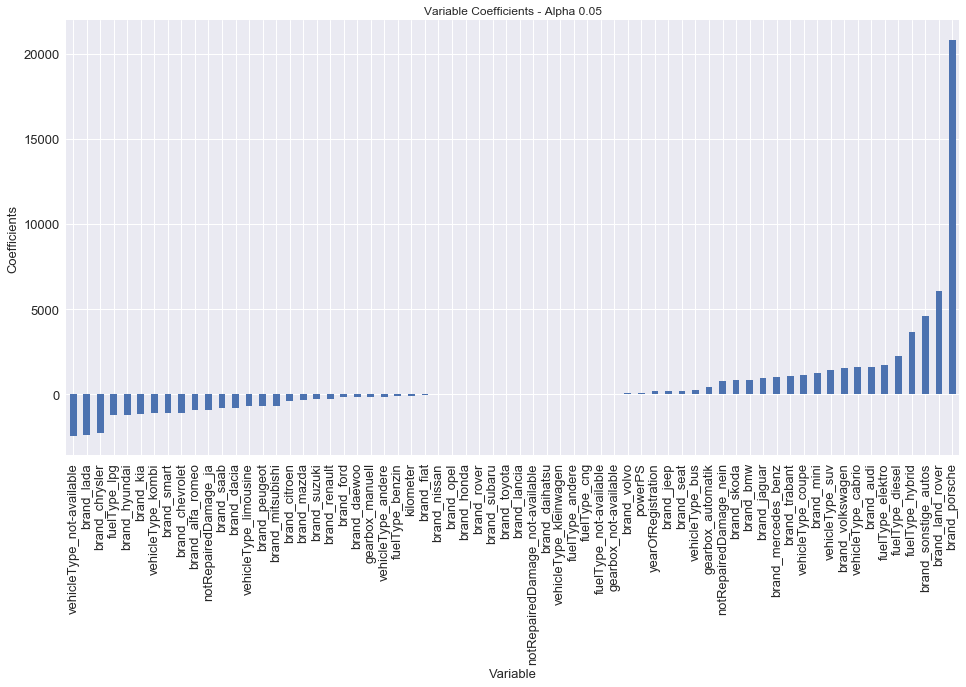

In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.05, normalize=True)

lasso.fit(X_train,y_train)

lasso_y_pred_test = lasso.predict(X_test)

# Checking the magnitude of coefficients

plt.figure(figsize=(16,8))
predictors = X_train.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
m_coef = coef.plot(kind='bar', title='Variable Coefficients - Alpha 0.05', fontsize=13)
plt.xlabel('Variable', fontsize=13)
plt.ylabel('Coefficients', fontsize=13)
lasso_model_coeff = m_coef.set_xticklabels(m_coef.get_xticklabels(), rotation=90)

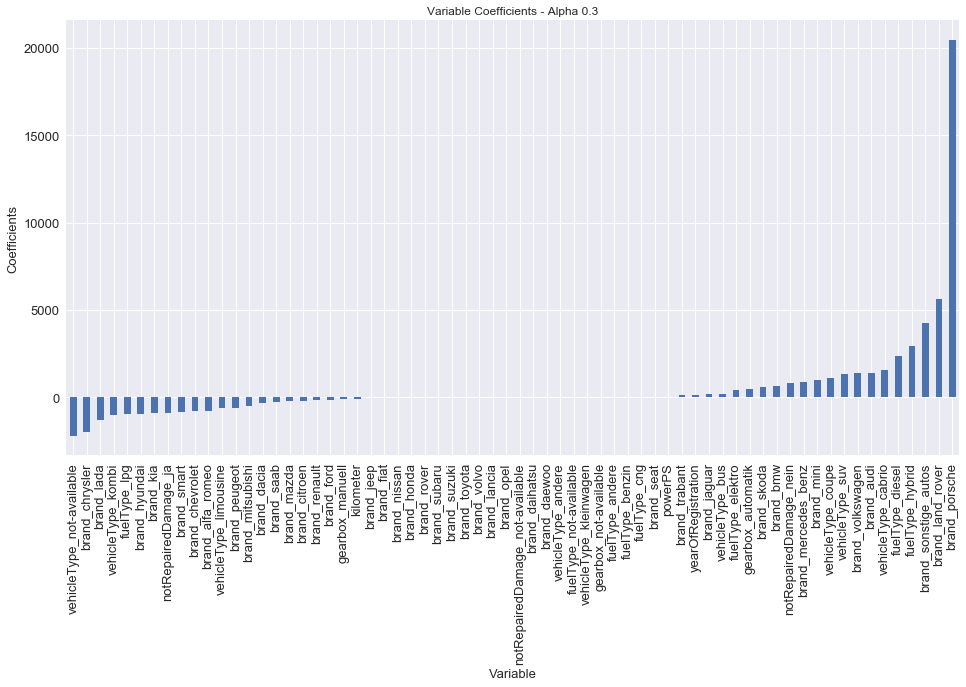

In [57]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train,y_train)
lasso_y_pred_test = lasso.predict(X_test)

# Checking the magnitude of coefficients

plt.figure(figsize=(16,8))
predictors = X_train.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
m_coef = coef.plot(kind='bar', title='Variable Coefficients - Alpha 0.3', fontsize=13)
plt.xlabel('Variable', fontsize=13)
plt.ylabel('Coefficients', fontsize=13)
lasso_model_coeff = m_coef.set_xticklabels(m_coef.get_xticklabels(), rotation=90)

*From the above bar graph, I could see that even at smaller alpha’s, the coefficients are reducing to absolute zeroes. The value of R-square(0.62) is maximum at alpha=0.05*

In [76]:
# Import SK learn Lasso Linear Regression
from sklearn.linear_model import Lasso

# Creating a LinearRegression object 
lasso_1 = Lasso(alpha = 0.05, normalize=True)

# Fit the model on the trainng data.
lasso_1.fit(X_train, y_train)

# Passing the predict method in the train and test data. This will return predicted values of y given the new test X data.
lasso_y_pred_train_1 = lasso_1.predict(X_train) 
lasso_y_pred_test_1 = lasso_1.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import ipy_table as tbl

# The mean absolute error for Train and Test Set
lasso_mae_train = mean_absolute_error(y_train, lasso_y_pred_train_1)
lasso_mae_test = mean_absolute_error(y_test, lasso_y_pred_test_1)

# The mean squared error for Train and Test Set
lasso_mse_train = mean_squared_error(y_train, lasso_y_pred_train_1)
lasso_mse_test = mean_squared_error(y_test, lasso_y_pred_test_1)

# The root mean squared error for Train and Test Set
lasso_rmse_train = sqrt(mean_squared_error(y_train, lasso_y_pred_train_1))
lasso_rmse_test = sqrt(mean_squared_error(y_test, lasso_y_pred_test_1))

# Variance score: 1 is perfect prediction
# Variance score for Train and Test Set
lasso_r2_train = r2_score(y_train, lasso_y_pred_train_1)
lasso_r2_test = r2_score(y_test, lasso_y_pred_test_1)

result = [
    ['Item', 'Train_Score_Values', 'Test_Score_Values'],
    ['Mean absolute error', lasso_mae_train, lasso_mae_test],
    ['Mean squared error', lasso_mse_train, lasso_mse_test],
    ['Root Mean squared error', lasso_rmse_train, lasso_rmse_test],
    ['Variance Score', lasso_r2_train, lasso_r2_test]
]
print("Lasso Regression Train and Test Scores")

tbl.make_table(result)

Lasso Regression Train and Test Scores


Item,Train_Score_Values,Test_Score_Values
Mean absolute error,2852.8866,2860.0955
Mean squared error,24709049.7275,24699407.9301
Root Mean squared error,4970.8198,4969.8499
Variance Score,0.6255,0.6202


*As we can see that, both the MSE (24670192.4396) and the value of R-square (0.6206) for the model has been increased. Therefore, linear regression model is predicting better than both lasso and ridge.*

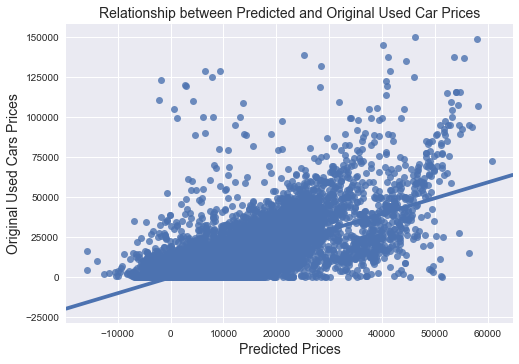

In [101]:
sns.regplot(y=y_test, x=linear_y_pred_test, fit_reg = True)
plt.xlabel("Predicted Prices", fontsize=14)
plt.ylabel("Original Used Cars Prices", fontsize=14)
plt.title("Relationship between Predicted and Original Used Car Prices", fontsize=14)

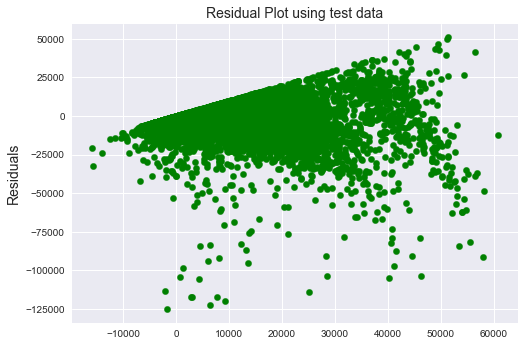

In [156]:
plt.scatter(linear_y_pred_test, (linear_y_pred_test - y_test), c='g', s=40)
plt.title('Residual Plot using test data', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

*As shown in above plot, it can be seen that the variance of error terms(residuals) is not constant. It is spreading out in shape of funnel as the predicted value increases. As one said, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby unevenly reducing the model’s performance. Plot shows the non linearity in data which is not captured by the model.*

**Ref:**

a) http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

b) http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html